In [1]:
import numpy as np
from matplotlib.pyplot import subplots
%matplotlib inline

from hilde.io import read
from hilde.trajectory import reader
from hilde.harmonic_analysis import HarmonicAnalysis
from hilde.konstanten import kB

In [2]:
primitive = read('geometry.in')
supercell = read('geometry.in.supercell')
force_constants = np.loadtxt('force_constants.dat')

In [3]:
ha = HarmonicAnalysis(primitive, supercell, force_constants)

.. found 4 (10) lattice points in 0.009s
.. found 4 (10) lattice points in 0.000s
.. found 4 (10) lattice points in 0.000s
.. matched 8 positions in supercell and primitive cell in 0.001s
.. setup for harmonic analysis finished in 0.023s


In [4]:
# Can be used with ha.project(..., times=times) to subtract harmonic frequencies from angles
# times = [at.info['nsteps'] * at.info['dt'] for at in trajectory]

trajectory_harmonic = reader('trajectories/harmonic.yaml.bz2')

A_qst2_ha, phi_qst_ha, E_qst_ha = ha.project(trajectory_harmonic)

.. found 4 (10) lattice points in 0.000s
.. matched 8 positions in supercell and primitive cell in 0.005s


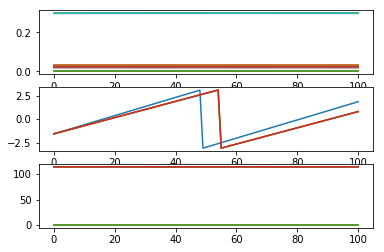

In [5]:
fig, axs = subplots(3)

for ii in range(4):
    axs[0].plot(A_qst2_ha[:, ii])
    axs[1].plot(phi_qst_ha[:, ii, -1])    
    axs[2].plot(E_qst_ha[:, ii] / kB)

.. found 4 (10) lattice points in 0.000s
.. matched 8 positions in supercell and primitive cell in 0.006s


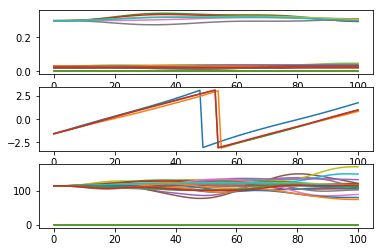

In [6]:
# aiMD
trajectory = reader('trajectories/aiMD.yaml.bz2')

A_qst2, phi_qst, E_qst = ha.project(trajectory)

fig, axs = subplots(3)

for ii in range(4):
    axs[0].plot(A_qst2[:, ii])
    axs[1].plot(phi_qst[:, ii, -1])    
    axs[2].plot(E_qst[:, ii] / kB)